# Exploratory Data Analysis - Cleaning

#### Objectives

1) Load the dataset.json file.<br>
2) Preprocess, Clean the data and create the csv file called data.csv<br>
3) Create the file keyword.csv<br>
4) Create the file with other attributes like metadata.csv<br>

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.stem import WordNetLemmatizer
import string
%matplotlib notebook

In [3]:
dataset_1 = json.load(open('dataset_1.json'))

In [4]:
dataset_2 = json.load(open('dataset_2.json'))

In [5]:
dataset = {**dataset_1, **dataset_2}

In [6]:
documents_data = []

In [7]:
%%time
for key in dataset:
    try:
        documents_data.append([dataset[key]["title"], dataset[key]["data"]])
    except:
        pass

Wall time: 998 µs


In [8]:
documents_data = np.array(documents_data)
documents_data = pd.DataFrame(documents_data, columns=["project", "data"])

In [9]:
documents_data.head()

,project,data
0,integrated spice modeling/simulation of circui...,integrated spice modeling/simulation circuit s...
1,secure online payment system using data hid...,secure online payment hiding technique electro...
2,“face detection and recognisation based atte...,face detection recognisation based attendance ...
3,3d image scanner,3d image scanner electronics telecommunication...
4,project phase 1 attendance management sys...,phase 1 attendance face recognition electronic...


In [10]:
documents_data.shape

(511, 2)

In [11]:
lemma = WordNetLemmatizer()

In [13]:
def preprocess(text):
    
    text = str(text).replace(".", " ").replace("/", " ")
    text = re.sub("b[0-9]{9}", "", str(text))
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    
    stop_list = ["input", "output", "fig", "database", "pict", "time", "paper", "description", "function", "class", "based", "process", "cid", "http", "www", "com", "electronics", "telecommunication"]
    
    removed_numbers = [token for token in tokens if token.isdigit() == False]
    lemmetized_data = [lemma.lemmatize(token) for token in removed_numbers]
    remove_len_one = [token for token in lemmetized_data if len(token) > 1]
    len_two_words = [token for token in remove_len_one if len(token) == 2 and token[0].isdigit() == False]
    remove_len_two = [token for token in remove_len_one if token not in len_two_words]
    remove_stop_words = [token for token in remove_len_two if token not in stop_list]
    
    return " ".join(remove_stop_words)

In [14]:
preprocess(documents_data["data"][0])

'integrated spice modeling simulation circuit schematic responsive nishant poorswani mitesh rane hrishikesh raut prof dudam integrated spice modeling simulation circuit schematic responsive completed nishant poorswani mitesh rane hrishikesh raut bona fide guidance prof dudam earlier diploma prof dudam prof ravinder prof hod acknowledgement participation assistance people enumerated contribution sincerely appreciated gratefully acknowledged group express deep appreciation indebtedness express deep sense gratitude dudam vinay sharma industrial valuable guidance keen interest constructive criticism encouragement stage completion thanking nishant poorswani mitesh rane hrishikesh raut definition approach acronym relevance background dsch highlight winspice delphi discussion standard circuit element step winspice working field vlsi electronic automation eda referred electronic computeraided ecad category designing electronic integrated circuit printed circuit board feasible physically implem

In [15]:
%%time
documents_data["data"] = documents_data["data"].apply(preprocess)

Wall time: 15.2 s


In [16]:
documents_data.head()

,project,data
0,integrated spice modeling/simulation of circui...,integrated spice modeling simulation circuit s...
1,secure online payment system using data hid...,secure online payment hiding technique shruti ...
2,“face detection and recognisation based atte...,face detection recognisation attendance tanmay...
3,3d image scanner,3d image scanner nangare akshay arun rakshe ve...
4,project phase 1 attendance management sys...,phase attendance face recognition sayali devad...


In [17]:
documents_data.shape

(511, 2)

In [18]:
def plot_10_most_common_words(count_data, count_vectorizer):
    
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [19]:
def plot_vectorizer(attr):
    count_vectorizer = CountVectorizer(stop_words='english')
    # Fit and transform the processed titles
    count_data = count_vectorizer.fit_transform(documents_data[attr])
    # Visualise the 10 most common words
    plot_10_most_common_words(count_data, count_vectorizer)

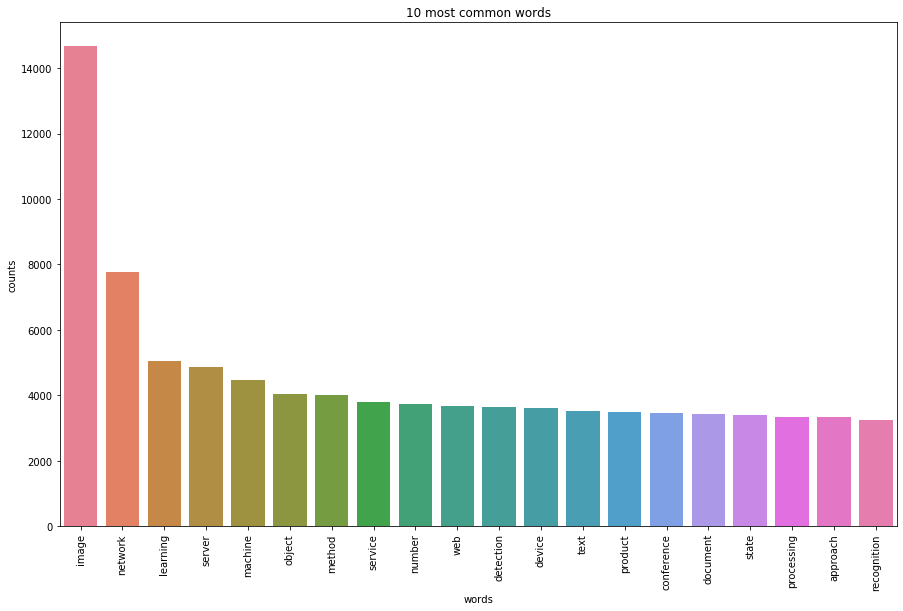

In [20]:
plot_vectorizer('data')

## Done with data cleaning

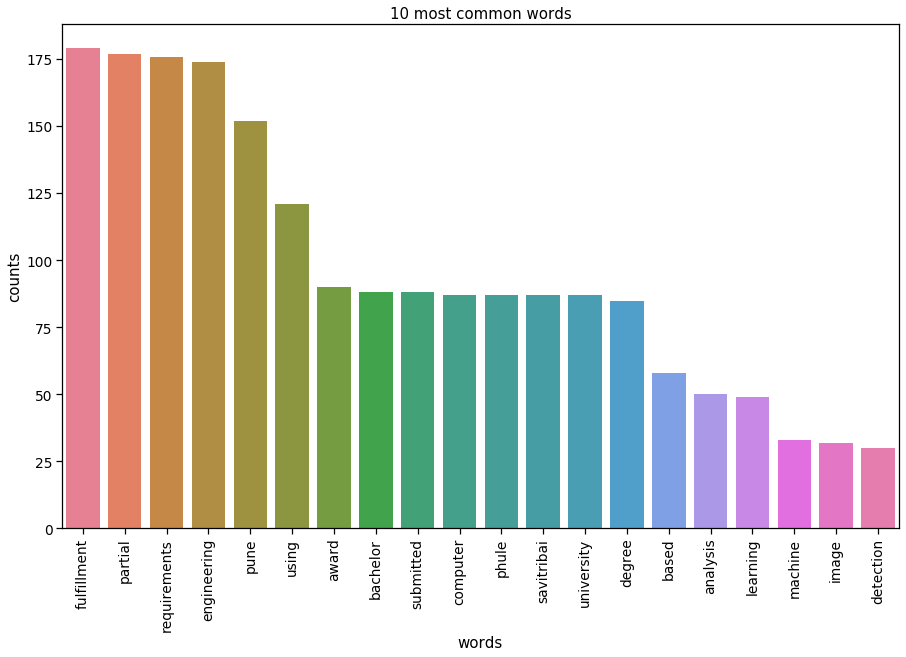

In [21]:
plot_vectorizer('project')

In [22]:
def preprocess_project_attr(text):
    
    stop_words = ["project", "pict", "phase", "fulfillment", "partial", "requirements", "engineering", "pune", "bachelor", "submitted", "computer", "phule", "savitribai", "university", "degree"]
    
    tokens = word_tokenize(text)
    removed_numbers = [token for token in tokens if len(token) > 1]
    removed_stop_words = [token for token in removed_numbers if token not in stop_words]
    return " ".join(removed_stop_words)

In [23]:
documents_data['project'][4]

'project phase 1      attendance management system using face   recognition'

In [24]:
preprocess_project_attr(documents_data['project'][4])

'attendance management system using face recognition'

In [25]:
%%time
documents_data['project'] = documents_data['project'].apply(preprocess_project_attr)

Wall time: 71.8 ms


In [26]:
documents_data.head()

,project,data
0,integrated spice modeling/simulation of circui...,integrated spice modeling simulation circuit s...
1,secure online payment system using data hiding...,secure online payment hiding technique shruti ...
2,face detection and recognisation based attenda...,face detection recognisation attendance tanmay...
3,3d image scanner,3d image scanner nangare akshay arun rakshe ve...
4,attendance management system using face recogn...,phase attendance face recognition sayali devad...


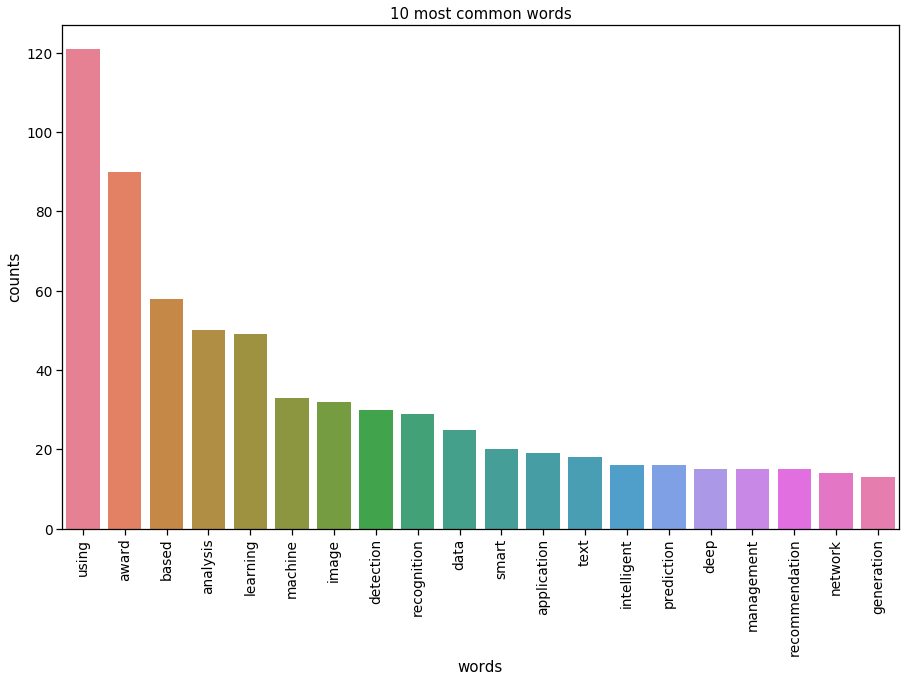

In [27]:
plot_vectorizer('project')

In [28]:
documents_data.shape

(511, 2)

In [29]:
len(dataset)

511

In [30]:
## Replace Filtered project names with Origin ones in dataset.json

In [31]:
projects_list = list(documents_data['project'])

In [32]:
count = 0
for key in dataset:
    dataset[key]["title"] = projects_list[count]
    count += 1

In [33]:
files_list = []

for key in dataset:
    files_list.append(dataset[key]["filename"])

In [34]:
files_list = np.array(files_list)

In [35]:
files_list = files_list.reshape(-1, 1)

In [36]:
files_list

array([['./reports_doc/1.pdf'],
       ['./reports_doc/102.pdf'],
       ['./reports_doc/103.pdf'],
       ['./reports_doc/18.pdf'],
       ['./reports_doc/22.pdf'],
       ['./reports_doc/24.pdf'],
       ['./reports_doc/25.pdf'],
       ['./reports_doc/29.pdf'],
       ['./reports_doc/2D TO 3D IMAGE CONVERSION USING_MACHINE LEARNING APPROACH.pdf'],
       ['./reports_doc/34.pdf'],
       ['./reports_doc/35.pdf'],
       ['./reports_doc/38.pdf'],
       ['./reports_doc/3D-image terrain classification using machine learning_46.pdf'],
       ['./reports_doc/50.pdf'],
       ['./reports_doc/52.pdf'],
       ['./reports_doc/54.pdf'],
       ['./reports_doc/56.pdf'],
       ['./reports_doc/76.pdf'],
       ['./reports_doc/85.pdf'],
       ['./reports_doc/90.pdf'],
       ['./reports_doc/91.pdf'],
       ['./reports_doc/93.pdf'],
       ['./reports_doc/97.pdf'],
       ['./reports_doc/99.pdf'],
       ['./reports_doc/A CRYPTOSYSTEM FOR ENCRYPTION OF_DATA USING IMAGES FOR KEY_GENERATION.pdf'

In [37]:
documents_data.shape

(511, 2)

In [38]:
documents_data['file'] = files_list

In [39]:
documents_data.head()

,project,data,file
0,integrated spice modeling/simulation of circui...,integrated spice modeling simulation circuit s...,./reports_doc/1.pdf
1,secure online payment system using data hiding...,secure online payment hiding technique shruti ...,./reports_doc/102.pdf
2,face detection and recognisation based attenda...,face detection recognisation attendance tanmay...,./reports_doc/103.pdf
3,3d image scanner,3d image scanner nangare akshay arun rakshe ve...,./reports_doc/18.pdf
4,attendance management system using face recogn...,phase attendance face recognition sayali devad...,./reports_doc/22.pdf


In [40]:
documents_data.to_csv('datasets/data.csv')

### data.csv is used for training LDA model

In [41]:
keywords_data = []

In [42]:
%%time
for key in dataset:
    try:
        for keyword in dataset[key]["keywords"]:
            keywords_data.append([dataset[key]["title"], keyword, dataset[key]["filename"]])
    except:
        pass

Wall time: 112 ms


In [43]:
keywords_data = pd.DataFrame(np.array(keywords_data), columns=['project', 'keyword', 'file'])

In [44]:
keywords_data.head()

,project,keyword,file
0,integrated spice modeling/simulation of circui...,circuit element,./reports_doc/1.pdf
1,integrated spice modeling/simulation of circui...,circuit simulation,./reports_doc/1.pdf
2,integrated spice modeling/simulation of circui...,circuit spice,./reports_doc/1.pdf
3,integrated spice modeling/simulation of circui...,component library,./reports_doc/1.pdf
4,integrated spice modeling/simulation of circui...,current source,./reports_doc/1.pdf


In [45]:
keywords_data.to_csv("./datasets/keywords.csv")

In [46]:
meta_data = []

In [47]:
%%time
for key in dataset:
    meta_data.append([dataset[key]['title'], dataset[key]['libraries'], dataset[key]['frameworks'], dataset[key]['dbs'], dataset[key]['filename']])

Wall time: 998 µs


In [48]:
meta_data = pd.DataFrame(np.array(meta_data), columns=['project', 'library', 'framework', 'dbs', 'file'])

In [49]:
meta_data.head()

,project,library,framework,dbs,file
0,integrated spice modeling/simulation of circui...,[],[],[],./reports_doc/1.pdf
1,secure online payment system using data hiding...,[],[],[],./reports_doc/102.pdf
2,face detection and recognisation based attenda...,[],[],[],./reports_doc/103.pdf
3,3d image scanner,[],[angular],[],./reports_doc/18.pdf
4,attendance management system using face recogn...,[opencv],[],[],./reports_doc/22.pdf


In [50]:
for i in ['library', 'framework', 'dbs']:
    meta_data[i] = meta_data[i].apply(lambda x: " ".join(x))

In [51]:
meta_data.head()

,project,library,framework,dbs,file
0,integrated spice modeling/simulation of circui...,,,,./reports_doc/1.pdf
1,secure online payment system using data hiding...,,,,./reports_doc/102.pdf
2,face detection and recognisation based attenda...,,,,./reports_doc/103.pdf
3,3d image scanner,,angular,,./reports_doc/18.pdf
4,attendance management system using face recogn...,opencv,,,./reports_doc/22.pdf


In [52]:
meta_data.to_csv("datasets/metadata.csv")